In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd 
nd1=np.load('mnist_20211236_total.npz')#이윤재
nd2=np.load('mnist_20201572_1.npz')#구유정
nd3=np.load('mnist_20171372.npz')#김석우
nd4=np.load('mnist_20170565.npz')#김성년
nd6=np.load('H_MNIST_train.npz')
print(nd1['img'].shape, nd1['img'].dtype, nd1['label'].shape, nd1['label'].dtype)
print(nd2['img'].shape, nd2['img'].dtype, nd2['label'].shape, nd2['label'].dtype)
print(nd3['img'].shape, nd3['img'].dtype, nd3['label'].shape, nd3['label'].dtype)
print(nd4['img'].shape, nd4['img'].dtype, nd4['label'].shape, nd4['label'].dtype)
print(nd6['img'].shape, nd6['img'].dtype, nd6['label'].shape, nd6['label'].dtype)

X=np.concatenate((nd1['img'], nd2['img'],nd3['img'],nd4['img'],nd6['img']), axis=0)
y=np.concatenate((nd1['label'], nd2['label'],nd3['label'],nd4['label'],nd6['label']), axis=0)
np.savez_compressed('mnist_all.npz', X=X, y=y)
nd5=np.load('mnist_all.npz')
nd5

(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int32
(1000, 28, 28) float64 (1000,) int32
(26720, 28, 28) float64 (26720,) int64


In [2]:
X=X.reshape(30720,784)
X.shape

(30720, 784)

In [3]:
#data cleaning : 질 안좋은 애들 다 빼 버렸다

In [4]:
a=X[23110:23120]
b=X[23230:23340]
c=X[23420:23450]
d=X[23520:23720]
e=X[23770:23780]
f=X[23900:23920]
g=X[23970:24110]
h=X[24140:24270]
i=X[24780:28410]
j=X[28460:30720]
a_0=X[:2000]
b_0=X[2100:2070]
c_0=X[2210:2220]
d_0=X[2230:2280]
e_0=X[2410:2800]
f_0=X[2900:6980]
g_0=X[6900:7300]
h_0=X[7400:7500]
i_0=X[7600:7680]
a_1=X[15361:18700]
b_1=X[19120:19290]
c_1=X[19300:19310]
d_1=X[19320:21760]
e_1=X[21780:21790]
f_1=X[21800:21810]
g_1=X[21820:21830]
h_1=X[21840:21850]
i_1=X[21860:21880]
j_1= X[21890:23050]
a_2=X[7680:8200]
b_2=X[8220:8340]
c_2=X[8360:9310]
d_2=X[9520:11920]
e_2=X[11950:12120]
f_2=X[12220:15361]

X_new=np.concatenate((a,b,c,d,e,f,h,g,h,i,j,a_0, b_0,c_0,d_0,e_0,f_0,g_0,h_0,i_0,a_1,b_1,c_1,d_1,e_1,f_1,g_1,h_1,i_1
                     ,j_1,a_2,b_2,c_2,d_2,e_2,f_2))
X_new=X_new.reshape(28260,784)
X_new.shape

(28260, 784)

In [5]:
a_3=y[23110:23120]
b_3=y[23230:23340]
c_3=y[23420:23450]
d_3=y[23520:23720]
e_3=y[23770:23780]
f_3=y[23900:23920]
g_3=y[23970:24110]
h_3=y[24140:24270]
i_3=y[24780:28410]
j_3=y[28460:30720]
a_4=y[:2000]
b_4=y[2100:2070]
c_4=y[2210:2220]
d_4=y[2230:2280]
e_4=y[2410:2800]
f_4=y[2900:6980]
g_4=y[6900:7300]
h_4=y[7400:7500]
i_4=y[7600:7680]
a_5=y[15361:18700]
b_5=y[19120:19290]
c_5=y[19300:19310]
d_5=y[19320:21760]
e_5=y[21780:21790]
f_5=y[21800:21810]
g_5=y[21820:21830]
h_5=y[21840:21850]
i_5=y[21860:21880]
j_5=y[21890:23050]
a_6=y[7680:8200]
b_6=y[8220:8340]
c_6=y[8360:9310]
d_6=y[9520:11920]
e_6=y[11950:12120]
f_6=y[12220:15361]
y_new=np.concatenate((a_3,b_3,c_3,d_3,e_3,f_3,h_3,g_3,h_3,i_3,j_3,a_4, b_4,c_4,d_4,e_4,f_4,g_4,h_4,i_4,a_5,b_5,c_5,d_5,e_5,f_5,g_5,h_5,i_5
                     ,j_5,a_6,b_6,c_6,d_6,e_6,f_6))
y_new.shape

(28260,)

In [6]:
#original MNIST data 불러오기

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X_mnist, y_mnist = mnist["data"], mnist["target"] # X, y: pandas DataFrame

In [9]:
y_mnist=y_mnist.astype(np.uint8)

In [10]:
#최종 데이터셋

In [11]:
X_final=np.concatenate((X_new, X_mnist), axis=0)
y_final=np.concatenate((y_new , y_mnist), axis=0)

In [12]:
#데이터셋 분할
#6:2:2

In [13]:
from sklearn.model_selection import train_test_split
X_train0, X_test, y_train0, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle =True, random_state = 8)
X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train0,test_size=0.25, shuffle =True,random_state= 8) # 0.25 x 0.8 = 0.2

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(58956, 784) (19652, 784) (19652, 784)
(58956,) (19652,) (19652,)


In [14]:
# 각자 맡은 모델에 대하여 성능 테스트 (extra tree)

In [15]:
#extra tree 디폴트
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import ExtraTreesClassifier
start_time=time.time()
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_train,y_train)
print('Fit time : ', time.time()- start_time)
print('cross_val_score',cross_val_score(extra_clf, X_train, y_train, cv=3, scoring="accuracy"))
pred =extra_clf.predict(X_val)
print('accuracy score:', accuracy_score(y_val, pred))

Fit time :  28.749264001846313
cross_val_score [0.88316711 0.88733971 0.88988398]
accuracy score: 0.9018929371056381


In [16]:
#Extra Classifier Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

def results(y_val, pred):
    print(classification_report(y_val,pred))
    print(confusion_matrix(y_val,pred))

    return confusion_matrix(y_val,pred)
conf_extra=results(y_val,pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1952
           1       0.90      0.97      0.94      2076
           2       0.89      0.89      0.89      1930
           3       0.88      0.87      0.87      1988
           4       0.92      0.90      0.91      1915
           5       0.91      0.89      0.90      1891
           6       0.91      0.92      0.92      1962
           7       0.88      0.92      0.90      2043
           8       0.91      0.86      0.88      1968
           9       0.91      0.86      0.89      1927

    accuracy                           0.90     19652
   macro avg       0.90      0.90      0.90     19652
weighted avg       0.90      0.90      0.90     19652

[[1823   30   20    4   13    6   20   20   11    5]
 [   3 2009   26   15    3    0    6   10    3    1]
 [  47   23 1725   48   24    4   18   14   21    6]
 [  27   30   58 1723    9   38   17   30   39   17]
 [  25   17   25    3 1732   

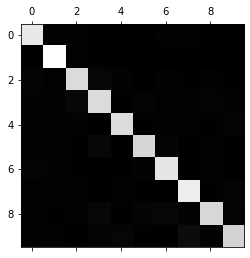

In [17]:
plt.matshow(conf_extra, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [18]:
row_sums = conf_extra.sum(axis=1, keepdims=True)
norm_conf_extra = conf_extra / row_sums
norm_conf_extra

array([[9.33913934e-01, 1.53688525e-02, 1.02459016e-02, 2.04918033e-03,
        6.65983607e-03, 3.07377049e-03, 1.02459016e-02, 1.02459016e-02,
        5.63524590e-03, 2.56147541e-03],
       [1.44508671e-03, 9.67726397e-01, 1.25240848e-02, 7.22543353e-03,
        1.44508671e-03, 0.00000000e+00, 2.89017341e-03, 4.81695568e-03,
        1.44508671e-03, 4.81695568e-04],
       [2.43523316e-02, 1.19170984e-02, 8.93782383e-01, 2.48704663e-02,
        1.24352332e-02, 2.07253886e-03, 9.32642487e-03, 7.25388601e-03,
        1.08808290e-02, 3.10880829e-03],
       [1.35814889e-02, 1.50905433e-02, 2.91750503e-02, 8.66700201e-01,
        4.52716298e-03, 1.91146881e-02, 8.55130785e-03, 1.50905433e-02,
        1.96177062e-02, 8.55130785e-03],
       [1.30548303e-02, 8.87728460e-03, 1.30548303e-02, 1.56657963e-03,
        9.04438642e-01, 6.78851175e-03, 1.14882507e-02, 1.14882507e-02,
        5.74412533e-03, 2.34986945e-02],
       [1.21628768e-02, 1.26916975e-02, 7.93231095e-03, 3.06716023e-02,
   

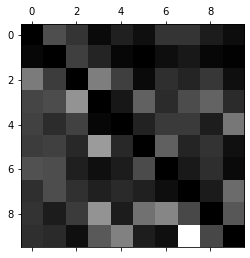

In [19]:
np.fill_diagonal(norm_conf_extra, 0)
plt.matshow(norm_conf_extra, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve
total=0
for i in range(10):
      y_train_i=(y_train==i)
      y_val_i=(y_test==i)

      y_scores = cross_val_predict(extra_clf, X_train, y_train_i, cv=3) 
      fpr, tpr, thresholds = roc_curve(y_train_i, y_scores)
      print("class",i," auc_score",roc_auc_score(y_train_i, y_scores))
      total+=roc_auc_score(y_train_i, y_scores)

class 0  auc_score 0.9085770774863379
class 1  auc_score 0.9539094426228194
class 2  auc_score 0.8608877897165326
class 3  auc_score 0.8299243268385434
class 4  auc_score 0.8662428674480578
class 5  auc_score 0.8431395601490104
class 6  auc_score 0.8783064208313828
class 7  auc_score 0.875176485244761
class 8  auc_score 0.823023653473558
class 9  auc_score 0.8308588547960125


In [21]:
#Grid Search
from sklearn.model_selection import GridSearchCV


params={'max_depth':[None,10,50,100],'n_estimators':[100,500,1000,1500]}
extra_grid=GridSearchCV(extra_clf,param_grid=params, cv=5,n_jobs=-1)
extra_grid.fit(X_train[:10000],y_train[:10000])

print(extra_grid.best_params_)
print(extra_grid.best_score_)

/Users/yoon-jaelee/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': None, 'n_estimators': 1500}
0.8423


In [22]:
%time extra_grid.best_estimator_.fit(X_train,y_train)
print(f'{extra_grid.best_params_}{extra_grid.best_estimator_.score(X_val,y_val):0.4f}')

CPU times: user 6min 41s, sys: 3.55 s, total: 6min 45s
Wall time: 6min 46s
{'max_depth': None, 'n_estimators': 1500}0.9102


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
sX_train_scaled = scaler.transform(X_train)
sX_val_scaled = scaler.transform(X_val)


from sklearn.preprocessing import RobustScaler
rscaler=RobustScaler()
rscaler.fit(X_train)
rX_train_scaled = rscaler.transform(X_train)
rX_val_scaled = rscaler.transform(X_val)


from sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler()
mscaler.fit(X_train)
mX_train_scaled = mscaler.transform(X_train)
mX_val_scaled = mscaler.transform(X_val)

from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)

In [24]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  clf.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=clf.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [25]:
names=["extra"]
classifiers=[ExtraTreesClassifier()]

for name,clf in zip(names,classifiers):
  scaling_names=['No_scaling','StandardScaler','RobustScalar','MinmaxScalaer','Normalizer']
  t_score=[]
  t_fit_times=[]
  t_pred_times=[]

  #no scaling
  score,fit_time,pred_time=fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val)
  t_score.append(score)
  t_fit_times.append(fit_time)
  t_pred_times.append(pred_time)


  try:
    #standardScaler
    sscore,sfit_time,spred_time=fit_and_calScoreTime(clf,sX_train_scaled,sX_val_scaled,y_train,y_val)
    t_score.append(sscore)
    t_fit_times.append(sfit_time)
    t_pred_times.append(spred_time)

    #RobustScaler
    rscore,rfit_time,rpred_time=fit_and_calScoreTime(clf,rX_train_scaled,rX_val_scaled,y_train,y_val)
    t_score.append(rscore)
    t_fit_times.append(rfit_time)
    t_pred_times.append(rpred_time)

    #MinmaxScalaer
    mscore,mfit_time,mpred_time=fit_and_calScoreTime(clf,mX_train_scaled,mX_val_scaled,y_train,y_val)
    t_score.append(mscore)
    t_fit_times.append(mfit_time)
    t_pred_times.append(mpred_time)

    #Normalizer
    nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)
    t_score.append(nscore)
    t_fit_times.append(nfit_time)
    t_pred_times.append(npred_time)

  except ValueError:
    continue

In [26]:
print(t_score)
print(t_fit_times)     
print( t_pred_times)

[0.9026053327905557, 0.9009769997964584, 0.9008243435782618, 0.9005699165479341, 0.8961937716262975]
[27.176713943481445, 27.04082989692688, 28.050233125686646, 27.46719002723694, 18.592222929000854]
[0.6453938484191895, 0.6232030391693115, 0.6862359046936035, 0.6279222965240479, 0.605633020401001]


In [27]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  %time extra_grid.best_estimator_.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=extra_grid.best_estimator_.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [28]:
from sklearn.preprocessing import RobustScaler
rob=RobustScaler()
rob.fit(X_train)
nX_train_scaled = rob.transform(X_train)
nX_val_scaled = rob.transform(X_val)

rscore,rfit_time,rpred_time=fit_and_calScoreTime(clf,rX_train_scaled,rX_val_scaled,y_train,y_val)

print(rscore)
print(rfit_time)     
print(rpred_time)

CPU times: user 6min 49s, sys: 4.28 s, total: 6min 53s
Wall time: 6min 55s
0.909220435579076
415.18769693374634
0.8893890380859375


In [29]:
extra_clf.score(X_test,y_test)

0.8981783024628537